In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

В этой тетрадке собраны baselines и условие задачи.

#Примеры рядов

Открываем файл с временными рядами

In [3]:
data_full_1_104 = pd.read_csv('data_full_1_104.csv')
data_full_1_104.irow(range(0,5))

,Unnamed: 0,ID,DiskSize,Creation,First,StartTime,Now,1,2,3,...,95,96,97,98,99,100,101,102,103,104
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.635799,104591,104670,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,134
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,2.819260,104607,104676,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1.370105,104607,104666,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,3.490704,104607,104740,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.289290,104607,104685,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Рисуем несколько рядов

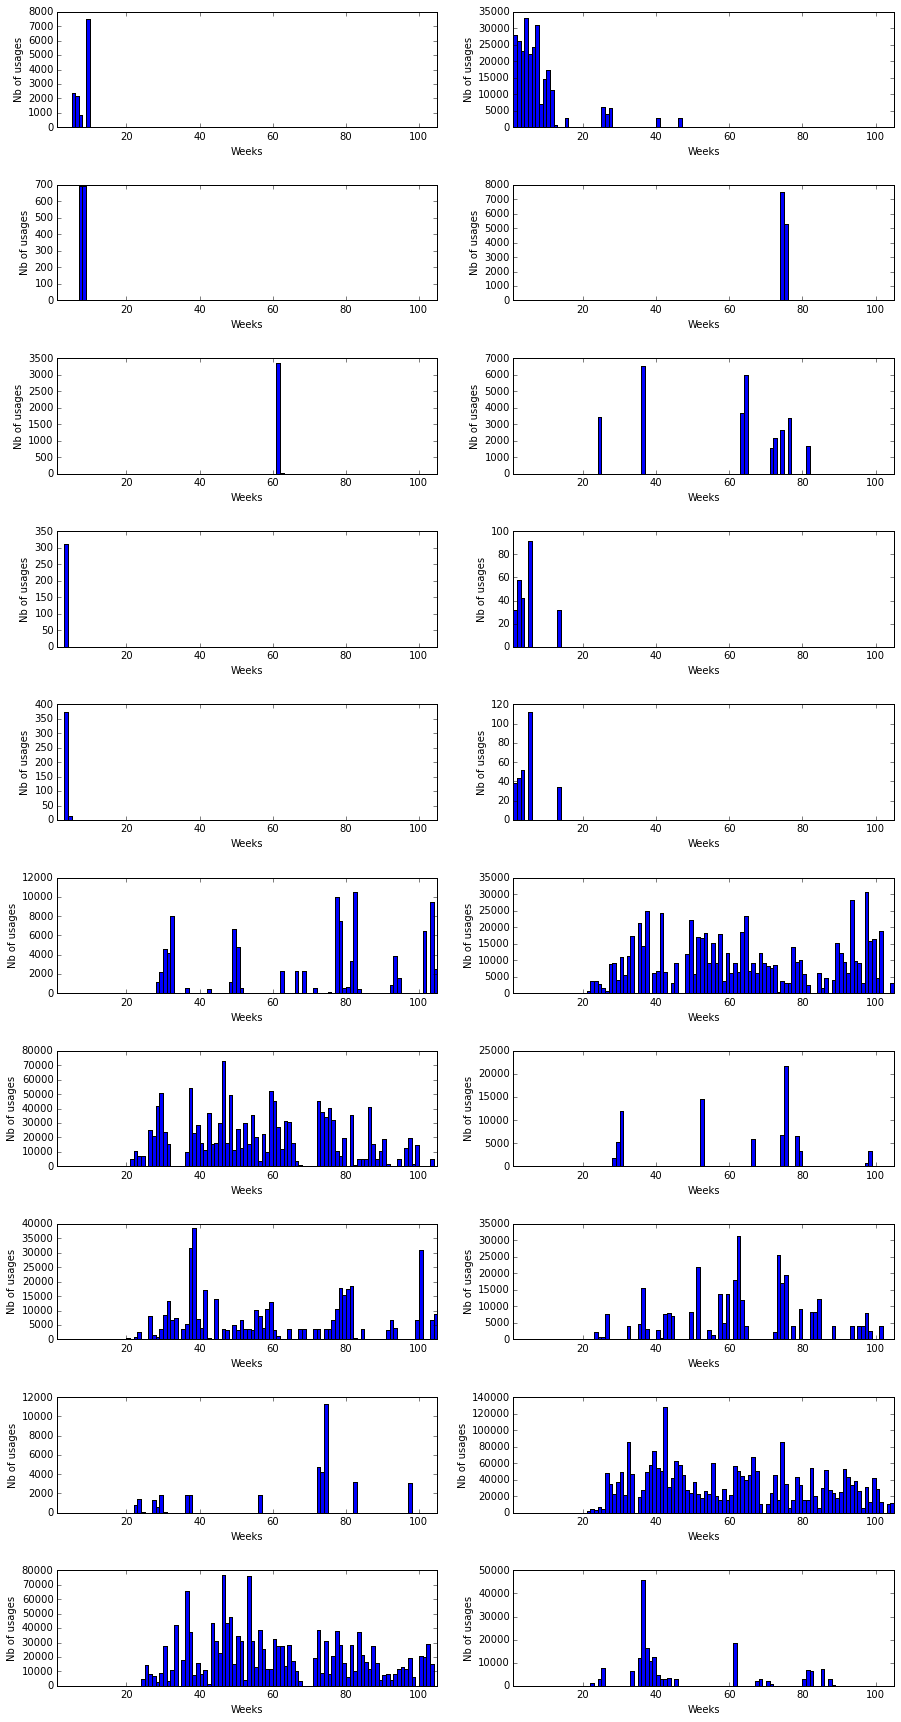

In [28]:
periods = [str(i) for i in range(1,105)]

plt.figure(figsize=(15,30))
plt.subplots_adjust( hspace=.5)
for i in range(48,68):#менять тут
    one_time_serie = data_full_1_104[periods].irow(i).values
    plt.subplot(10,2,i-47)#и тут
    plt.bar(range(1,105), one_time_serie, width=1, bottom=0)
    plt.xlim(1,105)
    plt.xlabel('Weeks')
    plt.ylabel('Nb of usages')
plt.show()

#Baselines

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Открываем первй файл задачи

In [199]:
data1_53 = pd.read_csv('data1_53.csv')
data1_53.irow(range(0,6))

,Unnamed: 0,ID,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,label
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,376,0,0,0,198,134,0,67,1
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagUp...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,266,260,0,130,1
4,4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagUp...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagUp...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Среднее число использований файлов по неделям

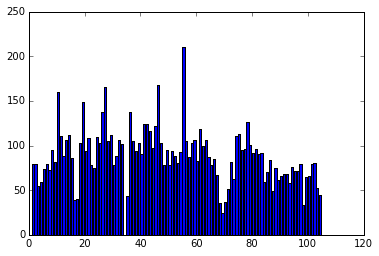

In [84]:
plt.bar(range(1, 105), (data_full_1_104.ix[:,'1':'104']).mean(axis=0));
plt.show;

Число использованных файлов всего по неделям

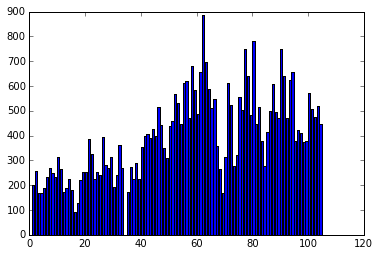

In [51]:
plt.bar(range(1, 105), [len(data_full_1_104[data_full_1_104[str(x)]>0]) for x in range(1, 105)]);

Делим данные на обучение/тестирование

In [94]:
from sklearn.cross_validation import train_test_split
ind_train, ind_test, _, _ = train_test_split(data1_53.index, data1_53.index, test_size=0.33, random_state=42)

Подготовка данных для классификатора

In [200]:
X_train = data1_53[[str(i) for i in range(1,53)]].values[ind_train,:]
X_test = data1_53[[str(i) for i in range(1,53)]].values[ind_test,:]

y_train = data1_53['label'].values[ind_train]
y_test = data1_53['label'].values[ind_test]

Обучаем классификатор

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=2500, max_depth=6, subsample=0.8)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2500,
              random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [124]:
gbc.score(X_test, y_test)

0.84008528784648184

Строим ROC кривые для обучения и теста

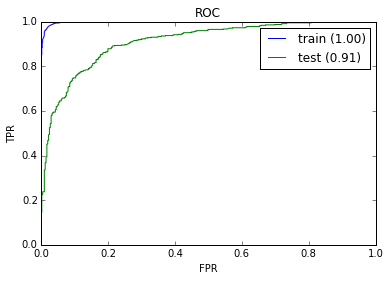

In [30]:
from sklearn.metrics import roc_curve, auc

fpr_train, tpr_train, _ = roc_curve(y_train, gbc.predict_proba(X_train)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label='train (%.2f)' % roc_auc_train)

fpr_test, tpr_test, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label='test (%.2f)' % roc_auc_test)

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()

Открываем второй файл данных

In [100]:
data2_54 = pd.read_csv('data2_54.csv')
data2_54.irow(range(0,3))

,Unnamed: 0,ID,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,label
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,376,0,0,0,198,134,0,67,0,1
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Подготовка данных

In [201]:
X_train2 = data2_54[[str(i) for i in range(2,54)]].values[ind_train,:]
X_test2 = data2_54[[str(i) for i in range(2,54)]].values[ind_test,:]

y_train2 = data2_54['label'].values[ind_train]
y_test2 = data2_54['label'].values[ind_test]

In [98]:
def draw_roc(X_test, y_test, X_test2, y_test2, label1, label2, clf) :
    fpr_test, tpr_test, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=label1+' (%.2f)' % roc_auc_test)

    fpr_test2, tpr_test2, _ = roc_curve(y_test2, clf.predict_proba(X_test2)[:,1])
    roc_auc_test2 = auc(fpr_test2, tpr_test2)
    plt.plot(fpr_test2, tpr_test2, label=label2+' (%.2f)' % roc_auc_test2)

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='best')
    plt.show()

Используем обученный классификатор для прогноза и строим ROC кривые

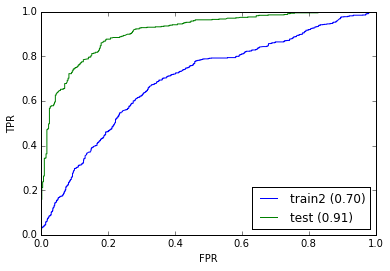

In [228]:
from sklearn.metrics import roc_curve, auc

draw_roc(X_train2, y_train2, X_test, y_test, 'train2', 'test', gbc)

ROC кривые на двух тестовых выборках и есть baselines задачи.

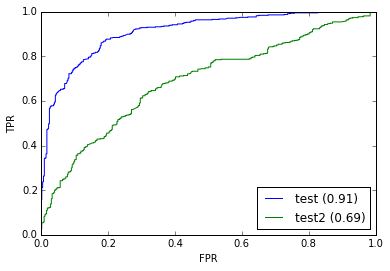

In [229]:
draw_roc(X_test, y_test, X_test2, y_test2, 'test', 'test2', gbc)

#Задача

1. Поставить ipython
2. Почитать про Restricted Boltzmann Machines (RBM) и Deep Belief Networks (DBN).
3. Выбрать и разобрать библиотеку с DBN (scikit-learn, nolearn, theanet(!?), pybrain(?)).
4. Используя DBN увеличить ROC AUC для test2.
5. Используя DBN увеличить ROC AUC для test и test2.

In [2]:
from sklearn.metrics import accuracy_score

In [10]:
from nolearn.dbn import DBN

In [72]:
results = []
for hiddens in range(2, 72, 5):
    dbn = DBN([X_train.shape[1], hiddens, 2], learn_rates = 0.3,
    learn_rate_decays = 0.9, epochs = 10)
    dbn.fit(X_train, y_train)
    results.append([hiddens, dbn.score(X_test, y_test)])

In [73]:
results

[[2, 0.5788912579957356],
 [7, 0.5788912579957356],
 [12, 0.5831556503198294],
 [17, 0.5788912579957356],
 [22, 0.5788912579957356],
 [27, 0.5831556503198294],
 [32, 0.5810234541577826],
 [37, 0.5852878464818763],
 [42, 0.5788912579957356],
 [47, 0.5831556503198294],
 [52, 0.5810234541577826],
 [57, 0.584221748400853],
 [62, 0.5810234541577826],
 [67, 0.5788912579957356]]

In [96]:
dbn = DBN(
    [X_train.shape[1], 300, 2],
    learn_rates=0.3,
    learn_rate_decays=0.9,
    epochs=10,
    verbose=0,
    )
dbn.fit(X_train, y_train)

In [97]:
dbn.score(X_test, y_test)

0.4211087420042644

In [121]:
dbn.predict_proba(X_train2).shape

(1902, 2)

In [101]:
from sklearn.metrics import classification_report
preds = dbn.predict(X_test)
print classification_report(y_test, preds)

             precision    recall  f1-score   support

        0.0       0.42      1.00      0.59       395
        1.0       0.00      0.00      0.00       543

avg / total       0.18      0.42      0.25       938



In [76]:
preds2 = dbn.predict(X_test2)
print classification_report(y_test2, preds)

             precision    recall  f1-score   support

        0.0       0.50      0.00      0.00       418
        1.0       0.55      1.00      0.71       520

avg / total       0.53      0.55      0.40       938



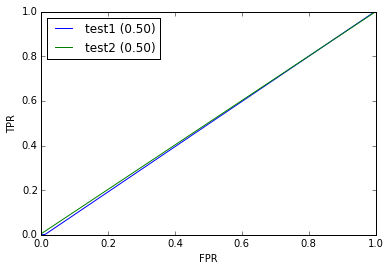

In [230]:
draw_roc(X_test, y_test, X_test2, y_test2, 'test1', 'test2', dbn)

In [129]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [160]:
def test_clf (X_train, y_train, X_test, y_test, clf, name) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print name, "accuracy: ",acc

In [187]:
def test_all (X_train, y_train, X_tests, y_tests, clfs, names) :
    for c in xrange(len(clfs)):
        for i in xrange(np.shape(X_tests)[0]) :
            test_clf (X_train, y_train, X_tests[i], y_tests[i], clfs[c], (names[c]+" test "+str(i+1)))

In [189]:
test_all (X_train, y_train, [X_test, X_test2], [y_test, y_test2], 
          [gbc, RandomForestClassifier(), SGDClassifier(), LinearSVC(), SVC(1), 
           DBN([X_train.shape[1], 30, 2],learn_rates=0.3,learn_rate_decays=0.9,epochs=15)],
         ['gradient boosting', 'random forest', 'stochastic gradient descent', 'linearSVM', 'SVM', 'deep belief net'])

gradient boosting test 1 accuracy:  0.842217484009
gradient boosting test 2 accuracy:  0.649253731343
random forest test 1 accuracy:  0.818763326226
random forest test 2 accuracy:  0.638592750533
stochastic gradient descent test 1 accuracy:  0.585287846482
stochastic gradient descent test 2 accuracy:  0.644989339019
linearSVM test 1 accuracy:  0.634328358209
linearSVM test 2 accuracy:  0.574626865672
SVM test 1 accuracy:  0.721748400853
SVM test 2 accuracy:  0.56289978678
deep belief net test 1 accuracy:  0.58315565032
deep belief net test 2 accuracy:  0.553304904051


In [241]:
rfc = RandomForestClassifier(n_estimators=15, max_leaf_nodes=10)
rfc.fit(X_train, y_train);

Random forest classifier


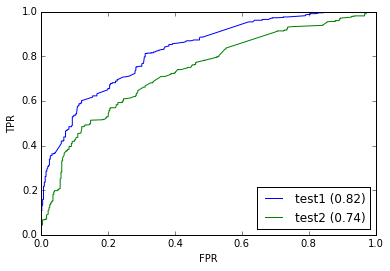

In [242]:
print 'Random forest classifier'
draw_roc(X_test, y_test, X_test2, y_test2, 'test1', 'test2', rfc)

Random forest classifier


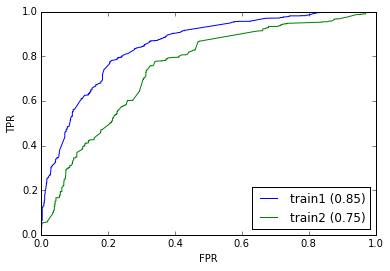

In [232]:
print 'Random forest classifier'
draw_roc(X_train, y_train, X_train2, y_train2, 'train1', 'train2', rfc)

In [164]:
def get_auc(clf, X_test, y_test):
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    return auc(fpr, tpr)

In [58]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [159]:
test_clf (X_train, y_train, X_test, y_test, gbc, "gradient boosting classifier")

gradient boosting classifier  accuracy:  0.840085287846


In [162]:
test_clf (X_train, y_train, X_test2, y_test2, gbc, "gradient boosting classifier test2")

gradient boosting classifier test2 accuracy:  0.6460554371


In [165]:
test_clf (X_train, y_train, X_test, y_test, RandomForestClassifier(), "random forest classifier")

random forest classifier accuracy:  0.80170575693


In [164]:
test_clf (X_train, y_train, X_test2, y_test2, RandomForestClassifier(), "random forest classifier test2")

random forest classifier test2 accuracy:  0.663113006397


In [166]:
test_clf (X_train, y_train, X_test, y_test, SGDClassifier(), "stochastic gradient descent classifier")

stochastic gradient descent classifier accuracy:  0.585287846482


In [168]:
test_clf (X_train, y_train, X_test2, y_test2, SGDClassifier(), "stochastic gradient descent classifier test2")

stochastic gradient descent classifier test2 accuracy:  0.644989339019


In [108]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [54]:
from sklearn.grid_search import GridSearchCV
epochs = [10, 15, 25, 50, 100, 250, 500, 1500, 2500]
dbn_est = DBN([X_train.shape[1], 200, 2], learn_rates = 0.1)
classifier = GridSearchCV(estimator=dbn_est, cv=cv, param_grid=dict(epochs=epochs))
classifier.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(1902, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=DBN(dropouts=0, epochs=10, epochs_pretrain=0, fan_outs=None,
  fine_tune_callback=None, l2_costs=0.0001, l2_costs_pretrain=None,
  layer_sizes=[52, 200, 2], learn_rate_decays=1.0, learn_rate_minimums=0.0,
  learn_rates=0.1, learn_rates_pretrain=None, loss_funct=None,
  minibatch_size=64, m...None, real_valued_vis=True,
  rms_lims=None, scales=0.05, uniforms=False, use_re_lu=True, verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'epochs': [10, 15, 25, 50, 100, 250, 500, 1500, 2500]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [63]:
classifier.grid_scores_

[mean: 0.60236, std: 0.01698, params: {'epochs': 10},
 mean: 0.60525, std: 0.01937, params: {'epochs': 15},
 mean: 0.60394, std: 0.01496, params: {'epochs': 25},
 mean: 0.60289, std: 0.02165, params: {'epochs': 50},
 mean: 0.60262, std: 0.02708, params: {'epochs': 100},
 mean: 0.60551, std: 0.01893, params: {'epochs': 250},
 mean: 0.60394, std: 0.02108, params: {'epochs': 500},
 mean: 0.59790, std: 0.02362, params: {'epochs': 1500},
 mean: 0.59108, std: 0.02248, params: {'epochs': 2500}]

In [64]:
dbn_est.epochs=5000
dbn_est.fit(X_train, y_train)

In [65]:
dbn.score(X_test, y_test)

0.6023454157782516

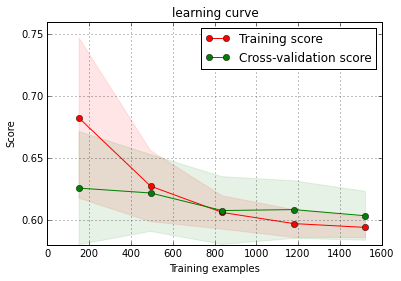

In [61]:
from sklearn.learning_curve import learning_curve
estimator = DBN([X_train.shape[1], 200, 2], learn_rates = 0.1, epochs=classifier.best_estimator_.epochs)
plot_learning_curve(estimator, "learning curve", X_train, y_train, cv=cv)
plt.show()

In [69]:
epochs2 = [10, 15, 25, 50, 100, 250, 500, 1000, 2000, 4000]
dbn_est500 = DBN([X_train.shape[1], 500, 2], learn_rates = 0.1)
classifier500 = GridSearchCV(estimator=dbn_est500, cv=cv, param_grid=dict(epochs=epochs2), verbose = 1)
classifier500.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:  9.2min


Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [202]:
X_train_scaled = scale(X_train.astype(np.float64))
X_test_scaled = scale(X_test.astype(np.float64))
X_test2_scaled = scale(X_test2.astype(np.float64))

In [152]:
%%time
from nolearn.dbn import DBN
from sklearn.preprocessing import scale

dbn = DBN(
    [X_train.shape[1], 300, 2],
    learn_rates=0.3,
    learn_rate_decays=0.9,
    epochs=400,
    verbose=0,
    )

dbn.fit(X_train_scaled, y_train)

Wall time: 2min 17s


In [153]:
dbn.score(X_test2_scaled, y_test)

0.5063965884861408

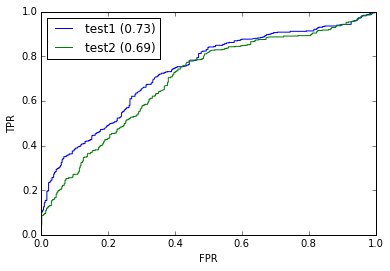

In [154]:
draw_roc(X_test_scaled, y_test, X_test2_scaled, y_test2, 'test1', 'test2', dbn)

In [110]:
from sklearn.grid_search import GridSearchCV
epochs = [10, 15, 25, 50, 100, 250, 500, 1000, 2000]
dbn_est = DBN([X_train.shape[1], 300, 2], learn_rates = 0.1)
classifier = GridSearchCV(estimator=dbn_est, cv=cv, param_grid=dict(epochs=epochs), verbose = 1)
classifier.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.0s


KeyboardInterrupt: 

In [130]:
epochs = [10, 15, 25, 50, 100, 250, 450, 700, 1000, 1500, 2500]

In [112]:
res_test1_epochs = []
res_test2_epochs = []
for i in epochs:
    dbn = DBN([X_train.shape[1], 300, 2], learn_rates = 0.1, epochs=i)
    dbn.fit(X_train_scaled, y_train)
    res_test1_epochs.append(dbn.score(X_test, y_test))
    res_test2_epochs.append(dbn.score(X_test2, y_test2))
    print 'trained on', i, 'epochs'

trained on 10 epochs
trained on 15 epochs
trained on 25 epochs
trained on 50 epochs
trained on 100 epochs
trained on 250 epochs
trained on 500 epochs
trained on 1000 epochs
trained on 2000 epochs


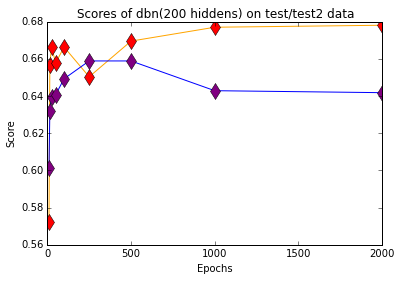

In [127]:
plt.title("Scores of dbn(200 hiddens) on test/test2 data")
plt.plot(epochs, res_test1_epochs, color='orange', marker='d',
         markerfacecolor='red', markersize=12)
plt.plot(epochs, res_test2_epochs, color='blue', marker='d',
         markerfacecolor='purple', markersize=12)
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.show()

In [ ]:
dbn = DBN([X_train.shape[1], 300, 300, 2], learn_rates = 0.1, epochs=10)
dbn.fit(X_train_scaled, y_train)

In [184]:
res_test1_epochs2 = []
res_test2_epochs2 = []
for i in epochs:
    dbn = DBN([X_train.shape[1], 200, 80, 2], learn_rates = 0.1, epochs=i)
    dbn.fit(X_train_scaled, y_train)
    score1 = get_auc(dbn, X_test_scaled, y_test)
    score2 = get_auc(dbn, X_test2_scaled, y_test2)
    res_test1_epochs2.append(score1)
    res_test2_epochs2.append(score2)
    print 'trained on', i, 'epochs', score1, score2

trained on 10 epochs 0.716784390517 0.702334836216
trained on 15 epochs 0.715921859337 0.700098914244
trained on 25 epochs 0.72641210341 0.697481137284
trained on 50 epochs 0.729298086113 0.699894184763
trained on 100 epochs 0.739536564329 0.698185038646
trained on 250 epochs 0.748068629508 0.683865476629
trained on 450 epochs 0.759507657878 0.679513249908
trained on 700 epochs 0.74975173089 0.671519598822
trained on 1000 epochs 0.665969648227 0.686584468163
trained on 1500 epochs 0.431762127888 0.442958686051
trained on 2500 epochs 0.515653775322 0.516346153846


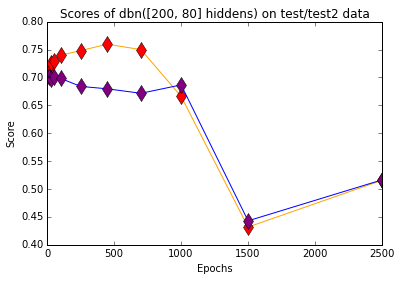

In [186]:
plt.title("Scores of dbn([200, 80] hiddens) on test/test2 data")
plt.plot(epochs, res_test1_epochs2, color='orange', marker='d',
         markerfacecolor='red', markersize=12)
plt.plot(epochs, res_test2_epochs2, color='blue', marker='d',
         markerfacecolor='purple', markersize=12)
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.show()

In [131]:
res_test1_epochs3 = []
res_test2_epochs3 = []
for i in epochs:
    dbn = DBN([X_train.shape[1], 80, 200, 2], learn_rates = 0.1, epochs=i)
    dbn.fit(X_train_scaled, y_train)
    score1 = dbn.score(X_test, y_test)
    score2 = dbn.score(X_test2, y_test2)
    res_test1_epochs3.append(score1)
    res_test2_epochs3.append(score2)
    print 'trained on', i, 'epochs', score1, score2

trained on 10 epochs 0.638592750533 0.630063965885
trained on 15 epochs 0.643923240938 0.633262260128
trained on 25 epochs 0.652452025586 0.643923240938
trained on 50 epochs 0.671641791045 0.634328358209
trained on 100 epochs 0.637526652452 0.628997867804
trained on 250 epochs 0.659914712154 0.644989339019
trained on 450 epochs 0.630063965885 0.632196162047
trained on 700 epochs 0.58315565032 0.619402985075
trained on 1000 epochs 0.585287846482 0.634328358209
trained on 1500 epochs 0.620469083156 0.654584221748
trained on 2500 epochs 0.667377398721 0.652452025586


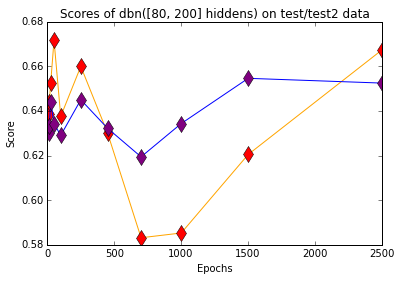

In [134]:
plt.title("Scores of dbn([80, 200] hiddens) on test/test2 data")
plt.plot(epochs, res_test1_epochs3, color='orange', marker='d',
         markerfacecolor='red', markersize=12)
plt.plot(epochs, res_test2_epochs3, color='blue', marker='d',
         markerfacecolor='purple', markersize=12)
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.show()

In [132]:
res_test1_epochs4 = []
res_test2_epochs4 = []
for i in epochs:
    dbn = DBN([X_train.shape[1], 200, 200, 2], learn_rates = 0.1, epochs=i)
    dbn.fit(X_train_scaled, y_train)
    score1 = dbn.score(X_test, y_test)
    score2 = dbn.score(X_test2, y_test2)
    res_test1_epochs4.append(score1)
    res_test2_epochs4.append(score2)
    print 'trained on', i, 'epochs', score1, score2

trained on 10 epochs 0.634328358209 0.616204690832
trained on 15 epochs 0.647121535181 0.626865671642
trained on 25 epochs 0.659914712154 0.637526652452
trained on 50 epochs 0.658848614072 0.640724946695
trained on 100 epochs 0.630063965885 0.644989339019
trained on 250 epochs 0.680170575693 0.641791044776
trained on 450 epochs 0.663113006397 0.657782515991
trained on 700 epochs 0.611940298507 0.657782515991
trained on 1000 epochs 0.660980810235 0.663113006397
trained on 1500 epochs 0.647121535181 0.643923240938
trained on 2500 epochs 0.69829424307 0.595948827292


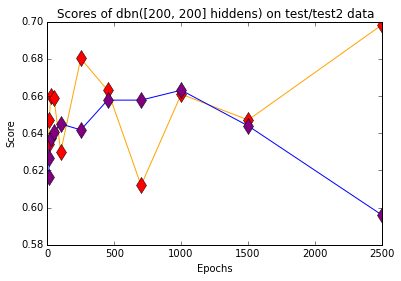

In [137]:
plt.title("Scores of dbn([200, 200] hiddens) on test/test2 data")
plt.plot(epochs, res_test1_epochs4, color='orange', marker='d',
         markerfacecolor='red', markersize=12)
plt.plot(epochs, res_test2_epochs4, color='blue', marker='d',
         markerfacecolor='purple', markersize=12)
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.show()

In [133]:
res_test1_epochs5 = []
res_test2_epochs5 = []
for i in epochs:
    dbn = DBN([X_train.shape[1], 300, 300, 2], learn_rates = 0.1, epochs=i)
    dbn.fit(X_train_scaled, y_train)
    score1 = dbn.score(X_test, y_test)
    score2 = dbn.score(X_test2, y_test2)
    res_test1_epochs5.append(score1)
    res_test2_epochs5.append(score2)
    print 'trained on', i, 'epochs', score1, score2

trained on 10 epochs 0.63539445629 0.620469083156
trained on 15 epochs 0.637526652452 0.628997867804
trained on 25 epochs 0.651385927505 0.638592750533
trained on 50 epochs 0.664179104478 0.642857142857
trained on 100 epochs 0.63539445629 0.641791044776
trained on 250 epochs 0.643923240938 0.658848614072
trained on 450 epochs 0.574626865672 0.609808102345
trained on 700 epochs 0.651385927505 0.644989339019
trained on 1000 epochs 0.66631130064 0.651385927505
trained on 1500 epochs 0.642857142857 0.650319829424
trained on 2500 epochs 0.578891257996 0.554371002132


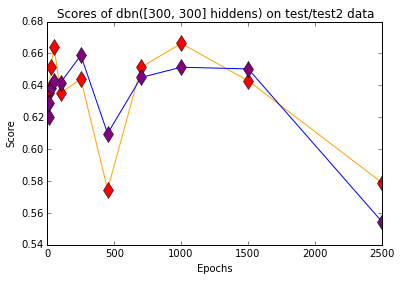

In [139]:
plt.title("Scores of dbn([300, 300] hiddens) on test/test2 data")
plt.plot(epochs, res_test1_epochs5, color='orange', marker='d',
         markerfacecolor='red', markersize=12)
plt.plot(epochs, res_test2_epochs5, color='blue', marker='d',
         markerfacecolor='purple', markersize=12)
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.show()

In [155]:
res_test1_epochs6 = []
res_test2_epochs6 = []
dbn = DBN([X_train.shape[1], 300, 300, 2], learn_rates = 0.1, epochs=250)
dbn.fit(X_train_scaled, y_train)
score1 = dbn.score(X_test_scaled, y_test)
score2 = dbn.score(X_test2_scaled, y_test2)
print score1, score2

0.642857142857 0.6460554371


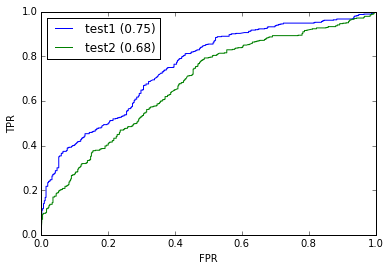

In [158]:
draw_roc(X_test_scaled, y_test, X_test2_scaled, y_test2, 'test1', 'test2', dbn)

In [165]:
%%time
res_test1_epochs7 = []
res_test2_epochs7 = []
for i in epochs:
    dbn = DBN([X_train.shape[1], 300, 500, 100, 2], learn_rates = 0.1, epochs=i)
    dbn.fit(X_train_scaled, y_train)
    score1 = get_auc(dbn, X_test_scaled, y_test)
    score2 = get_auc(dbn, X_test2_scaled, y_test2)
    res_test1_epochs5.append(score1)
    res_test2_epochs5.append(score2)
    print 'trained on', i, 'epochs', score1, score2

trained on 10 epochs 0.724901508264 0.698750920132
trained on 15 epochs 0.714560458773 0.693519966875
trained on 25 epochs 0.72327435485 0.700303643725
trained on 50 epochs 0.725761708278 0.698408170777
trained on 100 epochs 0.729736345199 0.690053367685
trained on 250 epochs 0.737037555074 0.687884155318
trained on 450 epochs 0.716224910833 0.694253772543
trained on 700 epochs 0.502123691633 0.50958778064
trained on 1000 epochs 0.565839102968 0.551414703717
trained on 1500 epochs 0.74207753456 0.685910471108
trained on 2500 epochs 0.526703499079 0.52769138756
Wall time: 1h 33min 28s


In [179]:
res_test1_epochs7 = res_test1_epochs5[19:30]
res_test2_epochs7 = res_test2_epochs5[19:30]

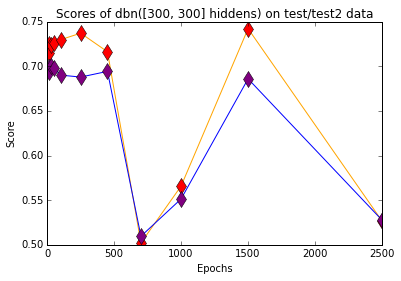

In [181]:
plt.title("Scores of dbn([300, 300] hiddens) on test/test2 data")
plt.plot(epochs, res_test1_epochs7, color='orange', marker='d',
         markerfacecolor='red', markersize=12)
plt.plot(epochs, res_test2_epochs7, color='blue', marker='d',
         markerfacecolor='purple', markersize=12)
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.show()

Протестировав различные количества итераций на разных структурах сети, оказалось, что 300 итераций - вполне универсальное количество

In [204]:
_dbn = DBN([X_train.shape[1], 50, 100, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.758997132667 0.675087412587


In [192]:
_dbn = DBN([X_train.shape[1], 100, 50, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.750390470196 0.686069193964


In [193]:
_dbn = DBN([X_train.shape[1], 70, 70, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.746343567149 0.682625598086


In [194]:
_dbn = DBN([X_train.shape[1], 50, 100, 50, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.743527519407 0.692296190651


In [195]:
_dbn = DBN([X_train.shape[1], 100, 50, 100, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.748478914609 0.690600846522


In [208]:
_dbn = DBN([X_train.shape[1], 50, 100, 100, 50, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.709343310721 0.691817721752


In [206]:
_dbn = DBN([X_train.shape[1], 100, 70, 40, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.745031121057 0.564754324623


In [207]:
_dbn = DBN([X_train.shape[1], 70, 100, 150, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.740494673287 0.686630474788


In [209]:
_dbn = DBN([X_train.shape[1], 150, 100, 70, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.747327318927 0.685399797571


In [210]:
_dbn = DBN([X_train.shape[1], 200, 500, 150, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.733195794578 0.697936602871


In [211]:
#overfitting
_dbn = DBN([X_train.shape[1], 400, 600, 300, 2], learn_rates = 0.05, epochs=600)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.74738093573 0.637456293706


In [212]:
_dbn = DBN([X_train.shape[1], 30, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(X_train_scaled, y_train)
print get_auc(_dbn, X_test_scaled, y_test), get_auc(_dbn, X_test2_scaled, y_test2)

0.748460265287 0.690069470004
